# Titanic

In [2]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

Loaded Libraries


In [39]:
df = pd.read_csv('titanic.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [44]:
df.dropna(axis=0, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [46]:
class_counts = df['Survived'].value_counts()
class_counts

0    549
1    340
Name: Survived, dtype: int64

In [47]:
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    61.754781
1    38.245219
dtype: float64

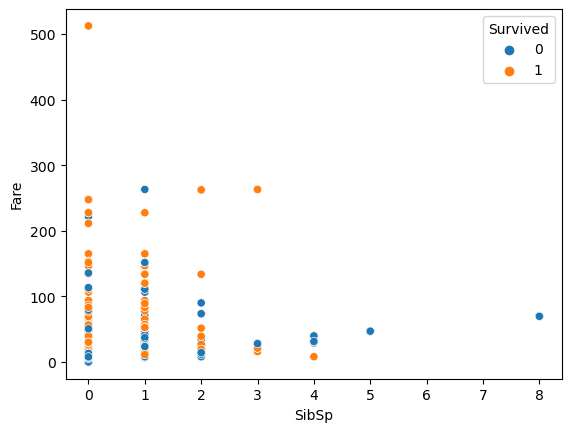

In [49]:
sns.scatterplot(x="SibSp", y="Fare", data=df, hue="Survived");

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [56]:
categorical_features = ['Sex',
                        'Embarked']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', dflog.shape[0], ' rows and ', dflog.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  889  rows and  10  columns

column names: 

Survived
Pclass
SibSp
Parch
Fare
Sex_female
Sex_male
Embarked_C
Embarked_Q
Embarked_S


In [57]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


# Two variable Logistic Regression

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['Fare','Pclass']],
                                                df['Survived'],
                                                train_size = 0.80,
                                                random_state = 42)

In [59]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [60]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [61]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.68


In [68]:
print(f'{accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

0.68


In [69]:
org = pd.read_csv('titanic.csv')

In [74]:
1 - (org.Survived.sum() / org.shape[0])

0.6161616161616161

In [75]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.69


In [76]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       440
           1       0.62      0.39      0.48       271

    accuracy                           0.68       711
   macro avg       0.66      0.62      0.62       711
weighted avg       0.66      0.68      0.65       711



In [77]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       109
           1       0.66      0.42      0.51        69

    accuracy                           0.69       178
   macro avg       0.68      0.64      0.64       178
weighted avg       0.69      0.69      0.67       178



# Logistic Regression 2

In [79]:
X = df.drop(columns = ['Survived'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (889, 9)


In [80]:
y = df['Survived']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (889,)


In [81]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  666  rows
 and the corresponding labels have an equal number of values. (666)
Test split has  223  rows
 and the corresponding labels have an equal number of values. (223)


In [83]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, 
                                                                  random_state = 2, 
                                                                  stratify = y)


In [84]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [85]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [86]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [87]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.78


In [88]:
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlrstrat, y_predict_test):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.78


In [89]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.81


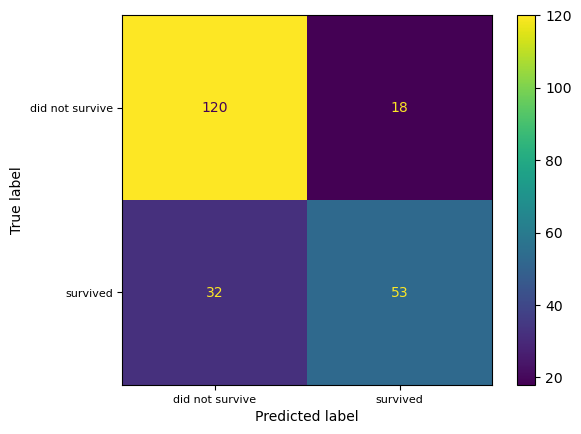

In [91]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['did not survive', 'survived'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['did not survive', 'survived'], fontsize = 8)
ax.set_yticklabels(labels = ['did not survive', 'survived'], fontsize = 8)
display_cm.plot(ax = ax)

In [92]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       411
           1       0.79      0.69      0.74       255

    accuracy                           0.81       666
   macro avg       0.81      0.79      0.80       666
weighted avg       0.81      0.81      0.81       666

